<a href="https://colab.research.google.com/github/ychervonyi/reinforcement-learning-learning/blob/main/Bairds_counterexample_chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 11.3 - Apply one step semi-gradient Q learning to Baird's counterexample and show empirically that its weights diverge.

In [118]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(12312321)

N_STATES = 7

class Env:
    def __init__(self):
        # Enumerate states
        self.states = np.arange(N_STATES)
        # Choose initial state randomly
        self.state = np.zeros(N_STATES)
        state_i = np.random.choice(self.states)
        self.state[state_i] = 1
    
    def update_state(self):
        # Behavior policy is uniform
        state_i = np.random.choice(self.states)
        self.state = np.zeros(N_STATES)
        self.state[state_i] = 1
    
    def get_state(self):
        return self.state

class Agent:
    def __init__(self, alpha):
        self.gamma = 0.99
        self.alpha = alpha
        self.w = np.random.rand(N_STATES)
        # self.w = np.random.randint(10, size=N_STATES).astype("float")
    
    def value_func(self, state):
        """State value function"""
        return np.dot(self.w, state)
    
    def update_weights(self, state, next_state, r):
        delta_t = r + self.gamma * self.value_func(next_state) - self.value_func(state)
        
        # Importance sampling
        if next_state[N_STATES - 1] == 1:
            b = 1 / 7
            pi = 1
        else:
            b = 6 / 7
            pi = 0
        rho = pi / b

        grad = state # For linear function approximation
        self.w += self.alpha * rho * delta_t * grad

class LearnAgent:
    def __init__(self, env, agent):
        self.env = env
        self.agent = agent
        self.history_w = []
    
    def step(self):
        s = self.env.get_state()
        self.env.update_state()
        next_s = self.env.get_state()
        # Reward is always 0
        self.agent.update_weights(s, next_s, 0)
        self.history_w.append(list(self.agent.w))

In [119]:
env = Env()
agent = Agent(0.1)
la = LearnAgent(env, agent)

In [120]:
for _ in range(1000):
    la.step()

In [122]:
agent.w

array([0.0705125 , 0.07051331, 0.0705205 , 0.07054004, 0.07052046,
       0.07054049, 0.0712246 ])

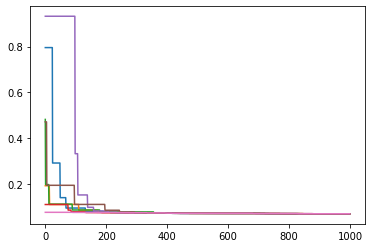

In [123]:
plt.plot(la.history_w)

Seems like the weights converge...